<a href="https://colab.research.google.com/github/debha-dev/ML-Journey/blob/main/Handwritten_Digit_Recognition_(MNIST)_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project: MNIST Handwritten Digit Classification Project**
Name: Itulua Cheluh

**Table of Contents**

1. Introduction
2. Dataset Description
3. Problem Definition
4. Data Preprocessing
5. Model Architecture
6. Model Training
7. Evaluation
8. Results & Discussion
9. Limitations
10 Conclusion

**Section I: Introduction**

The MNIST Handwritten Digit Classification Project is a foundational computer vision task designed to introduce how Convolutional Neural Networks (CNNs) recognize visual patterns. The dataset consists of grayscale images of handwritten digits (0–9), allowing us to train a model that can accurately classify new, unseen digit images. This project demonstrates how CNNs learn spatial hierarchies of features through convolution and pooling operations, making them highly effective for image-related tasks.

The goal of the project is to build, train, and evaluate a CNN model capable of recognizing digits with high accuracy. This includes understanding data preprocessing, designing the CNN architecture, training the model, and assessing its performance using standard metrics.

**Section II: Dataset Description**

Dataset: MNIST Handwritten Digit Dataset
Source: Built into TensorFlow/Keras (tf.keras.datasets.mnist)

**About the Dataset**

*   Total images: 70,000
*   Training images: 60,000
*   Test images: 10,000
*   Image size: 28 × 28 pixels
*   Color: Grayscale (single channel)
*   Classes: 10 (digits 0–9)

Each image represents a handwritten digit centered in a 28×28 matrix with pixel intensity values ranging from 0 to 255.

**Why MNIST?**

*  Easy to understand
*  Small and fast to train
*  Perfect for learning CNN fundamentals
*  Benchmark dataset used worldwide

**Section III: Problem Definition**

The task is a multiclass classification problem where the model predicts one of 10 possible digit classes (0–9) from an input image.

*  Input: 28×28 grayscale image

*  Output: Digit label (0–9)

*  Type of problem: Image Classification

*  Learning objective: Minimize classification error using deep learning (CNN)

**Section IV: Data Preprocessing**

To ensure the dataset is ready for training a CNN, the following preprocessing steps are applied:

1. **Loading the Dataset**

The dataset is loaded directly using:
`tf.keras.datasets.mnist.load_data()`

2. **Normalization**

Pixel values are scaled from 0–255 → 0–1 by dividing by 255.
This helps the model train faster and prevents exploding gradients.

3. **Reshaping**

Keras expects images in the format:
`(batch_size, 28, 28, 1)`

The extra dimension (1) represents the grayscale channel.

4. **Train–Test Split**

`x_train, y_train `(60,000 samples)

`x_test, y_test` (10,000 samples)

5. (Optional) Validation Split

We may split part of the training data (e.g., 10%) for validation during training.


**Section V: Model Architecture**

The CNN model for MNIST follows a simple and effective structure:

Layer-by-Layer Architecture

1. Conv2D (32 filters, 3×3 kernel)
* Extracts edges and simple patterns

2. ReLU activation
* Introduces non-linearity

3. MaxPooling (2×2)
* Reduces image size and computation

4. Conv2D (64 filters, 3×3 kernel)
* Learns more complex features (curves, shapes)

5. ReLU activation
6.  MaxPooling (2×2)

7. Flatten layer
* Converts 2D feature maps to 1D vector

8. Dense (128 units, ReLU)
* Learns high-level features

9. Dense (10 units, Softmax)
* Outputs probability for each digit class

**Why CNN?**

* CNNs learn spatial features automatically

* Translation invariance improves recognition

* Much fewer parameters than fully connected networks

**Section VI: Model Training**

**Loss Function**
* Categorical Cross-Entropy (for multi-class classification)

**Optimizer**
* Adam, learning rate = 0.001
Adaptive optimizer that speeds up training

**Evaluation Metrics**
* Accuracy (primary metric)

**Training Configuration**
* Epochs: 10–15
* Batch size: 32 or 64

**Training Process**

The model:

1. Performs forward propagation

2. Computes loss

3. Backpropagates gradients

4. Updates weights using Adam optimizer

**Section VII: Evaluation**

After training, the model is tested on the 10,000-image test set.

We compute:

1. **Test Accuracy**

   Measures overall model performance.

2. **Confusion Matrix**

   Shows which digits are correctly classified and which digits are confused with others.

3. Classification Errors

   For example, the model may confuse:

* 5 ↔ 3

* 9 ↔ 4

* 8 ↔ 3

4. **Visualizations**

   Optional but insightful:

* Filters learned in first Conv layer
* Feature maps at different layers
* Sample misclassified images

**Section VIII: Results & Discussion**

A well-trained CNN on MNIST typically achieves:

* 98%–99.5% accuracy

Key observations:

* Simple CNNs perform extremely well
* Most errors occur on digits written poorly
* More layers or data augmentation can slightly improve performance

**Section IX: Limitations**

Despite its popularity, MNIST has several limitations:

1. Too Easy
Models can reach >99% accuracy easily; not reflective of real-world complexity.

2. Centered and Clean Images
All digits are neatly centered and isolated; real-world handwriting is messier.

3. Low Resolution
28×28 pixels is small compared to real image datasets.

4. Not Diverse Enough
Digits look similar; lacks different handwriting styles from around the world.

Section X: Conclusion
**bold text**
The MNIST Handwritten Digit Classification Project demonstrates how CNNs can effectively learn patterns from image data. Through data preprocessing, CNN architecture design, training, and evaluation, the model learns to classify handwritten digits with high accuracy. This project forms the foundation for more advanced computer vision tasks such as facial recognition, object detection, and image segmentation.

ACTUAL WORK....LET'S START


In [ ]:
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Training set:", x_train.shape, y_train.shape)
print("Test set:", x_test.shape, y_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training set: (60000, 28, 28) (60000,)
Test set: (10000, 28, 28) (10000,)


**Normalization:**

Changing big pixel values (0–255) to small values (0–1).

We no like stress, we take things little by little… period

In [ ]:
# Convert pixel values from 0-255 to 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Verifying  normalization
print("Min pixel value:", x_train.min())
print("Max pixel value:", x_train.max())


Min pixel value: 0.0
Max pixel value: 1.0


**Reshaping:**

giving each image a "meat pie body" (28x28x1) because CNN only accepts images with a channel dimension

In [ ]:
# CNN only eats 28x28x1 images
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print("New training shape:", x_train.shape)
print("New test shape:", x_test.shape)


New training shape: (60000, 28, 28, 1)
New test shape: (10000, 28, 28, 1)


**Building CNN model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(32, kernel_size=3, input_shape= (28,28,1), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

**Compile:**

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

**TRAINIG:**

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 32ms/step - accuracy: 0.9024 - loss: 0.3162 - val_accuracy: 0.9829 - val_loss: 0.0603
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 46s 31ms/step - accuracy: 0.9845 - loss: 0.0476 - val_accuracy: 0.9893 - val_loss: 0.0379
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 32ms/step - accuracy: 0.9905 - loss: 0.0310 - val_accuracy: 0.9887 - val_loss: 0.0387
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 31ms/step - accuracy: 0.9928 - loss: 0.0217 - val_accuracy: 0.9885 - val_loss: 0.0390
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 46s 31ms/step - accuracy: 0.9948 - loss: 0.0152 - val_accuracy: 0.9904 - val_loss: 0.0358
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 31ms/step - accuracy: 0.9972 - loss: 0.0087 - val_accuracy: 0.9888 - val_loss: 0.0423
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 46s 31ms/step - accuracy: 0.9970 - loss: 0.0091 - val_accuracy: 0.9913 - val_loss: 0.0355
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 32ms/step - accuracy: 0.9971 -

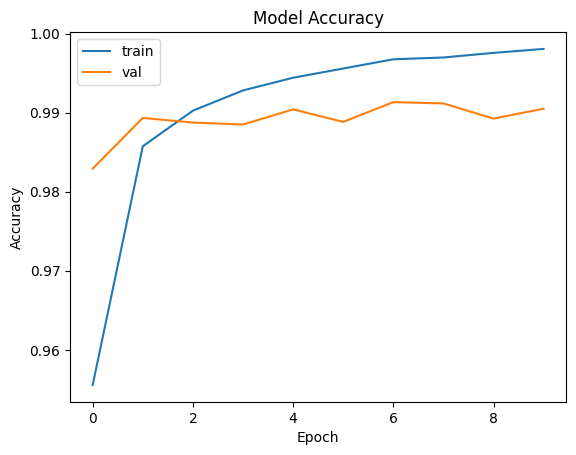

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


**OFF TO TESTING:**

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: ", test_loss)
print(f"Test Accuracy: ", test_accuracy)
#

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9888 - loss: 0.0428
Test Loss:  0.03292524814605713
Test Accuracy:  0.9911999702453613


**Confusion Matrix:**
Go crazy

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


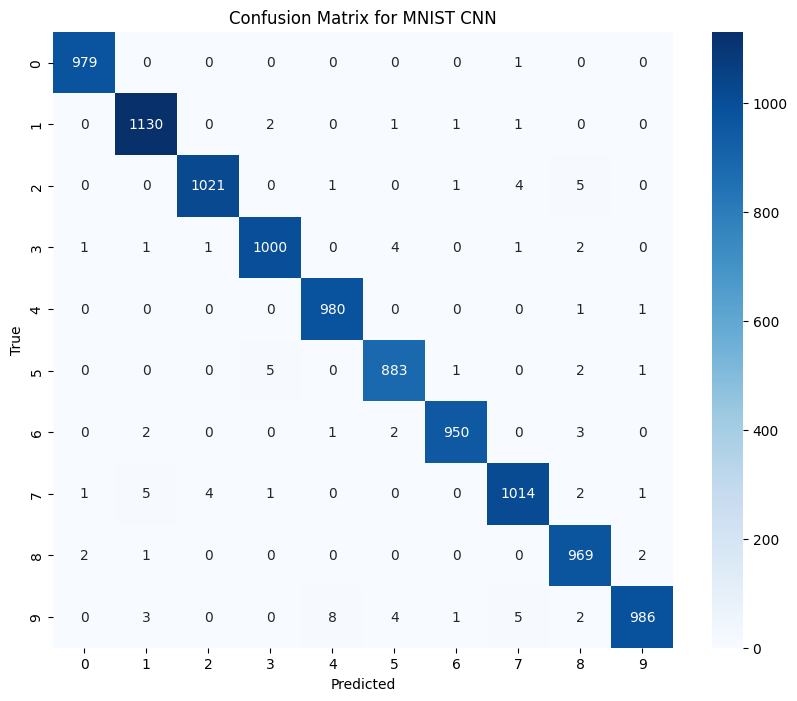

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for MNIST CNN')
plt.show()

**Visualizing filters from the first convolutional layer**


Filters shape: (3, 3, 1, 32)


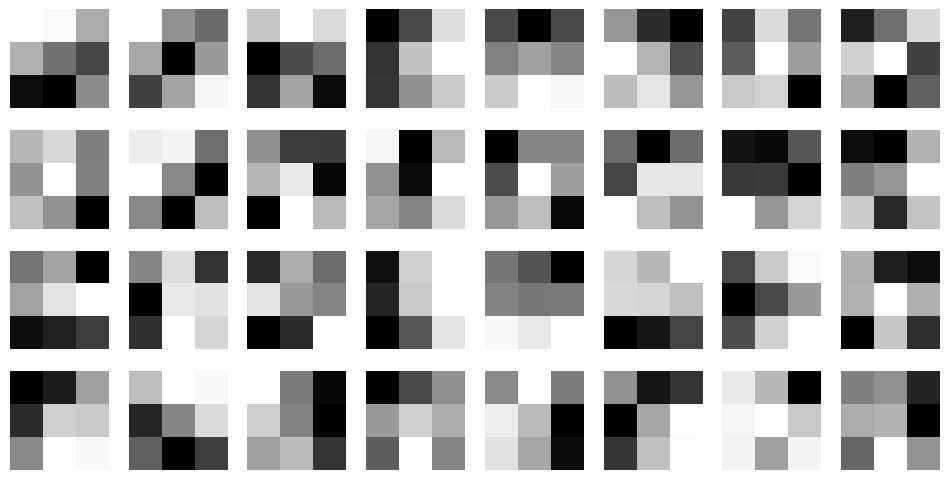

In [ ]:
first_conv_layer = model.layers[0]

filters, biases = first_conv_layer.get_weights()
print("Filters shape:", filters.shape)

import matplotlib.pyplot as plt

n_filters = filters.shape[3]
fig, axes = plt.subplots(4, 8, figsize=(12,6))

for i in range(n_filters):
    f = filters[:, :, 0, i]
    ax = axes[i//8, i%8]
    ax.imshow(f, cmap='gray')
    ax.axis('off')

plt.show()


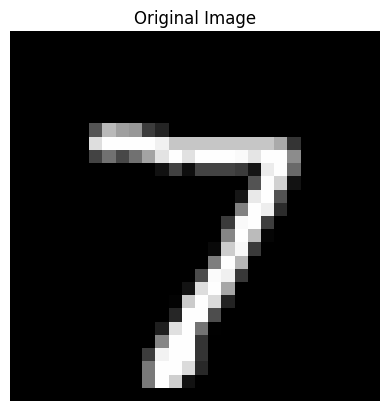

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

sample_image = x_test[0]
plt.imshow(sample_image.squeeze(), cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()


**Test your model on your own handwritten digits**

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
